###Rectification of panoramic image from Google Street View

####Pano image spliting into fish-eye camera

In [1]:
import cv2
import os

In [2]:
image_folder = '/content/Pano image'
output_folder = '/content/Pano trimmed'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(image_folder):
    img = cv2.imread(os.path.join(image_folder, filename))
    height, width = img.shape[:2]

    left = img[:, :width // 2]
    right = img[:, width//2:]

    left_name = filename.split(".")[0] + "_left.jpg"
    right_name = filename.split(".")[0] + "_right.jpg"

    cv2.imwrite(os.path.join(output_folder, left_name), left)
    cv2.imwrite(os.path.join(output_folder, right_name), right)

####Rectification with the trimmed fish-eye camera

In [3]:
!pip install defisheye

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 8.6 MB/s eta 0:00:00


In [4]:
from defisheye import Defisheye

In [5]:
folder = '/content/Pano trimmed'
output_folder = '/content/Pano rectified'

dtype = 'linear'
format = 'circular'
fov = 180
pfov = 120

for filename in os.listdir(folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(folder, filename)
        img_out_path = os.path.join(output_folder, filename)

        obj = Defisheye(img_path, dtype=dtype, format=format, fov=fov, pfov=pfov)
        obj.convert(outfile=img_out_path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

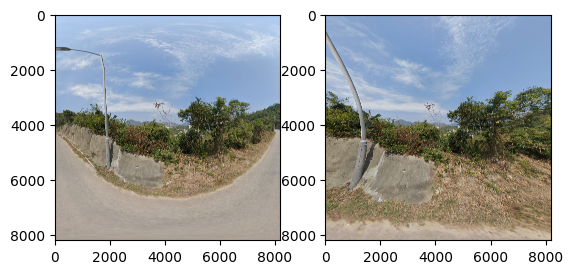

In [3]:
img1 = plt.imread('/content/Pano trimmed/Image_10_left.jpg')
img2 = plt.imread('/content/drive/MyDrive/Pano rectified/Image_10_left.jpg')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

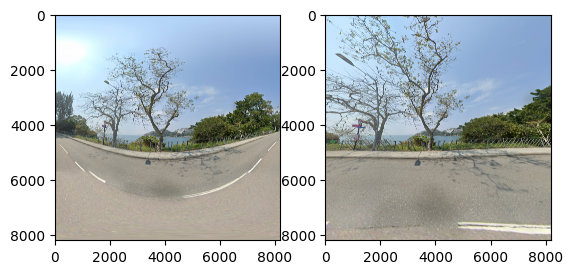

In [5]:
img1 = plt.imread('/content/Pano trimmed/Image_54_right.jpg')
img2 = plt.imread('/content/drive/MyDrive/Pano rectified/Image_54_right.jpg')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

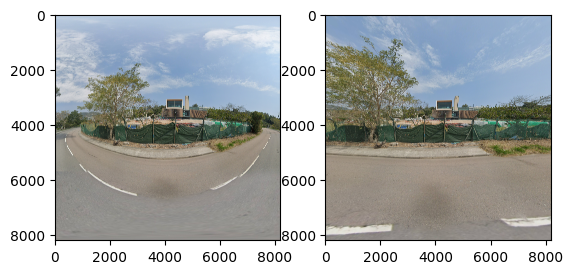

In [6]:
img1 = plt.imread('/content/Pano trimmed/Image_59_right.jpg')
img2 = plt.imread('/content/drive/MyDrive/Pano rectified/Image_59_right.jpg')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

###Resize the image for the segmetnation

In [9]:
import cv2

In [8]:
image = cv2.imread('/content/drive/MyDrive/Pano rectified/Image_58_right.jpg')

# Get original height and width
height, width = image.shape[:2]

# Define new resolution
new_width = 3000
new_height = 3000

# Resize image
resized = cv2.resize(image, (new_width, new_height))

# Save resized image
cv2.imwrite('resized_image.jpg', resized)

True

####Individual Tree semantic segmentation from Lang-SAM (Around 3 mins)

In [10]:
!pip install torch torchvision
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-d4et1py2
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-d4et1py2
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit fcdb92f9ae4ac3a5b4e5fd85c1576e09132f10bc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-c8lkvj5m/groundingdino_d051a30367b94992984a6481d728914b
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-c8lkvj5m/groundingdino_d051a30367b94992984a6481d728914b
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 60d796825e1266e56f7e4e9e00e88de662b67bd3
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [11]:
from PIL import Image
from lang_sam import LangSAM

/usr/local/lib/python3.10/dist-packages/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [12]:
model = LangSAM()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


In [14]:
image = Image.open("/content/resized_image.jpg").convert("RGB")
masks, boxes, phrases, logits = model.predict(image, "tree")

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:874: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


In [13]:
import matplotlib.pyplot as plt
import numpy as np

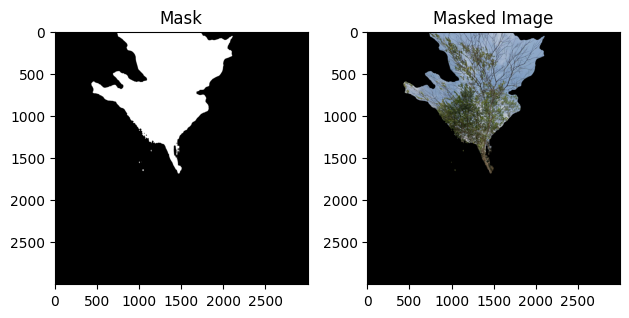

In [15]:
mask = masks[0]
image_arr = np.array(image)
masked_image = np.zeros_like(image_arr)
masked_image[mask>0] = image_arr[mask>0]
masked_img = Image.fromarray(masked_image.astype('uint8'))

masked_img.save('masked_image.png')

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(mask, cmap='gray')
ax1.set_title('Mask')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(masked_img)
ax2.set_title('Masked Image')
plt.tight_layout()
plt.show()

Clone the Tree Vision package

In [16]:
!git clone https://github.com/ottoykh/Tree-vision.git

Cloning into 'Tree-vision'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 31 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (31/31), 552.39 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [17]:
cd /content/Tree-vision/TreeVision/TreeAI

/content/Tree-vision/TreeVision/TreeAI


In [18]:
from Diagnosis import TreeAI, TreeAI_Batch

Prediction: Lion’s tailing 獅尾 , 0.5214982032775879 %
Prediction: Signs of pests and disease 呈現病蟲害徵狀 , 0.16351161897182465 %
Prediction: Crown reducedexcessively thinned topped 樹冠大幅減少削頂截頭 , 0.1346999853849411 %
Prediction: Heavy lateral limb 重側枝 , 0.07512571662664413 %
Prediction: Crooks abrupt bends 不常規彎曲 , 0.03190089762210846 %


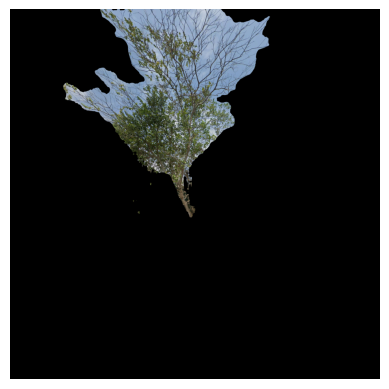

In [23]:
TreeAI("/content/masked_image.png")